# <a id="top"></a>  📊 Exploratory Data Analysis of ABCDEats Dataset
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

## Objectives
This notebook performs an **Exploratory Data Analysis (EDA)** on the ABCDEats dataset to uncover insights into customer behaviors, spending patterns, and trends that could support strategic decisions. Our analysis aims to:

1. **Summarize Key Statistics**: Calculate and interpret key measures to understand data characteristics.
2. **Identify Trends and Patterns**: Examine promotional effectiveness, payment preferences, regional concentration, and purchasing patterns.
3. **Detect Anomalies**: Highlight outliers or unusual data points that may reveal unique customer segments or operational insights.
4. **Feature Engineering**: Create new features like order frequency and average order value to enhance analysis.
5. **Visualize Findings**: Use charts and graphs to communicate our insights clearly and effectively.

## Index

1. **Exploration of the Dataset**
2. **Summary of Important Statistics**<br>
    >2.1. **Correlation**<br>
    2.2. **Box-Plot**<br>
    2.2.1. **Box-Plots of the Mean of CUI's, DOW's, HR's**<br>
    2.3. **Histograms**<br>
    2.4 **Heatmaps**<br>
3. **Create New Features**
4. **Identify Trends, Patterns, or Anomalies**
5. **Conclusion**

# Imports

In [1]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math
from scipy.stats import chi2_contingency
import numpy as np 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
#from somoclu import Somoclu
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA   
from sklearn.metrics import silhouette_score
from minisom import MiniSom

**Read the Dataset**

In [21]:
data = pd.read_excel("VIF_&_Scaled_DM2425_ABCDEats_DATASET.xlsx", sheet_name="Sheet1")

In [22]:
data

,customer_age,vendor_count,is_chain,first_order,last_order,top_cuisine_ratio,weekend_spending,weekday_spending,weekend_spending_ratio,products_per_vendor,region_avg_spending,age_spending_interaction,last_promo,payment_method,regular_customer,cuisine_loyalty
0,0.2250,0.04878,0.012048,0.000000,0.011111,1.000000,0.034483,0.013333,0.020776,0.035714,0.113810,0.014172,0.155609,0.03268,0,0
1,0.2125,0.04878,0.024096,0.000000,0.011111,0.667361,0.034483,0.013333,0.031234,0.014286,0.892586,0.008903,0.011138,0.03268,0,1
2,0.4750,0.02439,0.024096,0.000000,0.011111,1.000000,0.034483,0.013333,0.065217,0.028571,0.591596,0.009531,0.011138,0.00000,0,0
3,0.0000,0.04878,0.012048,0.000000,0.022222,0.565906,0.034483,0.013333,0.019011,0.021429,0.591596,0.000000,0.155609,0.03268,0,1
4,0.2500,0.04878,0.000000,0.000000,0.022222,0.737193,0.034483,0.013333,0.010823,0.035714,0.591596,0.030228,1.000000,0.03268,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,0.3750,0.02439,0.012048,0.244444,0.000000,1.000000,0.034483,0.000000,0.033259,0.014286,0.892586,0.014754,0.000000,0.03268,1,0
31884,0.0000,0.02439,0.000000,0.244444,0.000000,1.000000,0.034483,0.000000,0.033259,0.014286,0.892586,0.000000,0.155609,0.03268,1,0
31885,0.3000,0.02439,0.012048,0.244444,0.000000,1.000000,0.034483,0.000000,0.033727,0.014286,0.892586,0.011640,1.000000,0.03268,1,0
31886,0.4250,0.02439,0.000000,0.244444,0.000000,1.000000,0.034483,0.000000,0.049875,0.014286,0.892586,0.011151,0.011138,0.03268,1,0


In [23]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
customer_age,31888.0,0.335992,0.102291,0.0,0.275000,0.325000,0.387500,1.0
vendor_count,31888.0,0.075673,0.067600,0.0,0.024390,0.048780,0.097561,1.0
is_chain,31888.0,0.033962,0.047922,0.0,0.012048,0.024096,0.036145,1.0
first_order,31888.0,0.316190,0.267465,0.0,0.077778,0.244444,0.500000,1.0
last_order,31888.0,0.707506,0.258068,0.0,0.544444,0.777778,0.922222,1.0
top_cuisine_ratio,31888.0,0.740841,0.238252,0.0,0.543636,0.737775,1.000000,1.0
weekend_spending,31888.0,0.046801,0.064659,0.0,0.000000,0.034483,0.068966,1.0
weekday_spending,31888.0,0.040155,0.051400,0.0,0.013333,0.026667,0.053333,1.0
weekend_spending_ratio,31888.0,0.030993,0.047924,0.0,0.000000,0.017341,0.041943,1.0
products_per_vendor,31888.0,0.025508,0.019205,0.0,0.014286,0.021429,0.028571,1.0


CLUSTERING
[⬆️ Back to Top](#top)

TIPOS DE CLUSTERING QUE AFINAL VAMOS USAR

K-MEANS 

SOM - WITH K-MEANS

HIERARCHICAL CLUSTERING - WITH K-MEANS AND SOM

DBSCAN

K-PROTOTYPES

Group 1: Customer Demographics

customer_age

is_chain

regular_customer

cuisine_loyalty


Group 2: Spending Behavior

weekend_spending

weekday_spending

weekend_spending_ratio

products_per_vendor

region_avg_spending

age_spending_interaction


Group 3: Order Timing & Promotions

first_order

last_order

last_promo

payment_method


Group 4 (Optional): Top-Specific Behavior

top_cuisine_ratio

vendor_count

In [28]:
# Define the groups as subsets of the dataset
group_1 = data[['customer_age', 'is_chain', 'regular_customer', 'cuisine_loyalty']]  # Customer Demographics
group_2 = data[['weekend_spending', 'weekday_spending', 'weekend_spending_ratio',   # Spending Behavior
                'products_per_vendor', 'region_avg_spending', 'age_spending_interaction']]
group_3 = data[['first_order', 'last_order', 'last_promo', 'payment_method']]       # Order Timing & Promotions
group_4 = data[['top_cuisine_ratio', 'vendor_count']]                               # Top-Specific Behavior # Top-Specific Behavior (Optional)

# Display the group assignments for clarity
groups_summary = {
    "Group 1: Customer Demographics": group_1,
    "Group 2: Spending Behavior": group_2,
    "Group 3: Order Timing & Promotions": group_3,
    "Group 4: Top-Specific Behavior (Optional)": group_4
}

groups_summary


{'Group 1: Customer Demographics':        customer_age  is_chain  regular_customer  cuisine_loyalty
 0            0.2250  0.012048                 0                0
 1            0.2125  0.024096                 0                1
 2            0.4750  0.024096                 0                0
 3            0.0000  0.012048                 0                1
 4            0.2500  0.000000                 0                1
 ...             ...       ...               ...              ...
 31883        0.3750  0.012048                 1                0
 31884        0.0000  0.000000                 1                0
 31885        0.3000  0.012048                 1                0
 31886        0.4250  0.000000                 1                0
 31887        0.3750  0.000000                 1                0
 
 [31888 rows x 4 columns],
 'Group 2: Spending Behavior':        weekend_spending  weekday_spending  weekend_spending_ratio  \
 0              0.034483          0.013333   

## K-Means Clustering

**K-Means** is a popular **centroid-based clustering algorithm** that partitions data into **K distinct clusters**. It is simple, efficient, and widely used for customer segmentation, behavior analysis, and more.

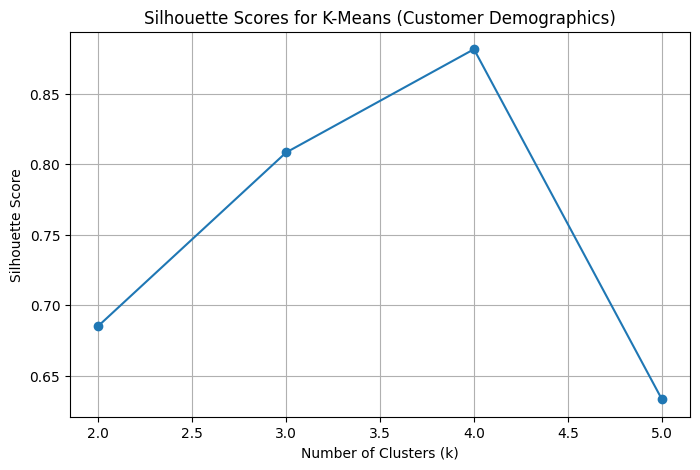

(4, np.float64(0.8818098231655875))

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)  # Trying 2 to 5 clusters
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_1)
    score = silhouette_score(group_1, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Customer Demographics)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k, max(silhouette_scores)


Cluster Summary:
         customer_age  vendor_count  is_chain  first_order  last_order  \
Cluster                                                                  
0            0.282824      0.100949  0.045323     0.224333    0.788373   
1            0.335544      0.025591  0.007946     0.518668    0.522070   
2            0.336780      0.041310  0.019203     0.310239    0.707581   
3            0.336354      0.103465  0.058164     0.453518    0.602785   
4            0.439553      0.100510  0.045726     0.227669    0.793067   

         top_cuisine_ratio  weekend_spending  weekday_spending  \
Cluster                                                          
0                 0.589507          0.061170          0.052314   
1                 1.000000          0.013718          0.009718   
2                 1.000000          0.033256          0.027362   
3                 0.631249          0.072022          0.068256   
4                 0.589288          0.059862          0.053196   

 

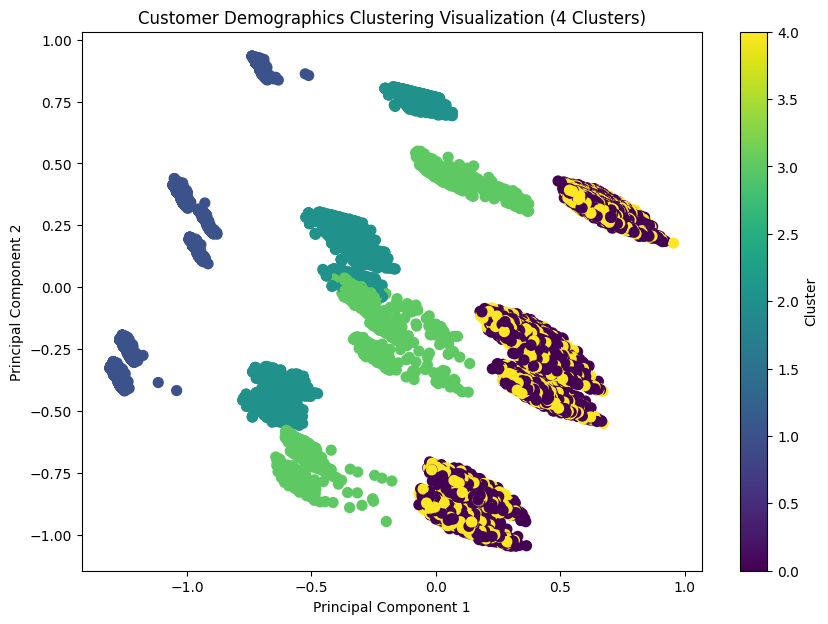

In [9]:
# Step 1: Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Step 2: Summarize each cluster
cluster_summary = data.groupby('Cluster').mean()

print("Cluster Summary:")
print(cluster_summary)

# Step 3: Visualize clusters with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
demographics_pca = pca.fit_transform(data.drop(columns='Cluster'))

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    demographics_pca[:, 0],
    demographics_pca[:, 1],
    c=kmeans.labels_,
    cmap='viridis',
    s=50
)
plt.colorbar(scatter, label="Cluster")
plt.title("Customer Demographics Clustering Visualization (4 Clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Analysis of Customer Demographics Clusters

### **Cluster 0:**
- **Customer Age:** Lower average age compared to other clusters.
- **Is Chain:** Moderate preference for chain restaurants.
- **Regular Customer:** Low likelihood of being a regular customer.
- **Cuisine Loyalty:** Moderate loyalty to specific cuisines.

**Interpretation:**
This cluster could represent younger, occasional customers who have diverse dining preferences but show moderate loyalty to chain restaurants. These customers might be exploring their options and are not highly tied to specific brands or cuisines.

---

### **Cluster 1:**
- **Customer Age:** Slightly higher than Cluster 0 but not the highest.
- **Is Chain:** Low preference for chain restaurants.
- **Regular Customer:** Lowest among all clusters.
- **Cuisine Loyalty:** High loyalty to specific cuisines.

**Interpretation:**
This group likely includes younger or middle-aged customers who prefer local or independent restaurants. Their strong loyalty to specific cuisines could be leveraged by promoting those cuisines through targeted advertising.

---

### **Cluster 2:**
- **Customer Age:** Middle-aged customers, with a balanced distribution.
- **Is Chain:** Very low preference for chain restaurants.
- **Regular Customer:** Higher than Cluster 1 but still moderate.
- **Cuisine Loyalty:** High loyalty, similar to Cluster 1.

**Interpretation:**
This cluster might represent middle-aged customers who frequent local restaurants and exhibit consistent preferences for certain cuisines. They may have more stable dining habits and could be attracted by personalized offers.

---

### **Cluster 3:**
- **Customer Age:** Middle-aged to older customers.
- **Is Chain:** Moderate preference for chain restaurants.
- **Regular Customer:** High likelihood of being a regular customer.
- **Cuisine Loyalty:** Moderate loyalty to specific cuisines.

**Interpretation:**
This cluster represents older, loyal customers who occasionally visit chain restaurants but are not overly loyal to a particular cuisine. They could be targeted with loyalty programs or promotional offers from chains.

---

### **Cluster 4:**
- **Customer Age:** The oldest among all clusters.
- **Is Chain:** High preference for chain restaurants.
- **Regular Customer:** Highest likelihood of being a regular customer.
- **Cuisine Loyalty:** High loyalty to specific cuisines.

**Interpretation:**
This is the most loyal and mature customer segment, with strong ties to chain restaurants and specific cuisines. They represent high-value customers who would respond well to exclusive offers, premium memberships, or rewards programs.

---

### **Overall Observations:**
1. **Age Variations:** There is a clear progression in customer age across clusters, from younger (Cluster 0) to older (Cluster 4).
2. **Chain Preference:** Clusters 1 and 2 have a strong preference for local or independent restaurants, whereas Clusters 3 and 4 lean toward chains.
3. **Regularity:** Regular customers are concentrated in Clusters 3 and 4, suggesting loyalty programs should target these segments.
4. **Cuisine Loyalty:** Clusters 1, 2, and 4 exhibit the highest loyalty to specific cuisines, which could guide marketing strategies focusing on their preferences.


SOM with K-Means

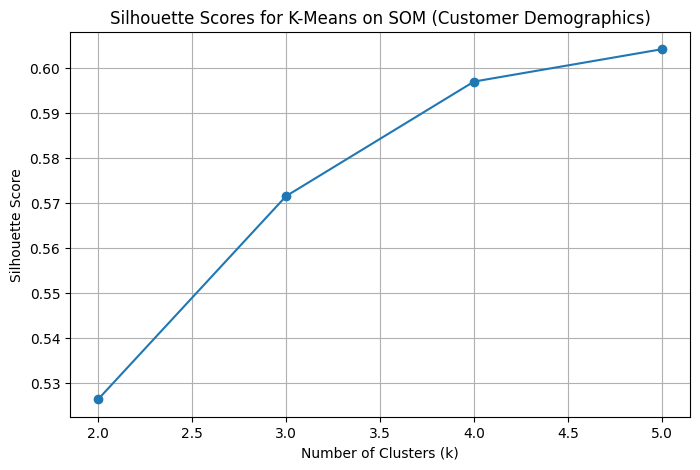

Optimal k: 5, Silhouette Score: 0.6042289694020687


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_26496\3197692664.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['SOM_Cluster'] = group_1_som_clusters


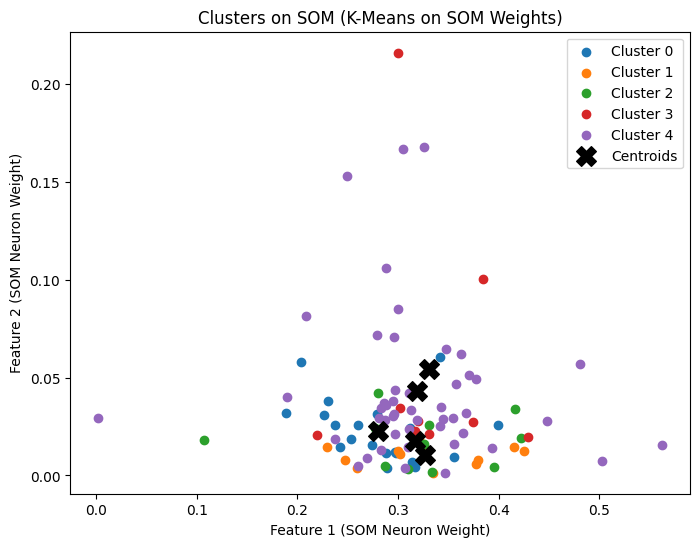

Cluster Summary:
             customer_age  is_chain  regular_customer  cuisine_loyalty
SOM_Cluster                                                           
1                0.335544  0.007946               0.0              0.0
2                0.336780  0.019203               1.0              0.0
3                0.336354  0.058164               0.0              1.0
4                0.335960  0.045460               1.0              1.0


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)
som.train_random(data=group_1.values, num_iteration=100)

# Step 2: Extract weights from SOM
som_weights = np.array(som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1]))

# Step 3: Apply K-Means to SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM (Customer Demographics)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Assign data points to clusters based on SOM mapping
group_1_som_clusters = np.array([
    kmeans.predict([som_weights[som.winner(row)[0] * som_grid_y + som.winner(row)[1]]])[0] 
    for row in group_1.values
])

# Add cluster labels to the dataset
group_1['SOM_Cluster'] = group_1_som_clusters

# Step 5: Visualize the SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (SOM Neuron Weight)")
plt.ylabel("Feature 2 (SOM Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_1.groupby('SOM_Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

Recommendations:
While this clustering method is insightful, its silhouette score is slightly lower than traditional K-means. You may want to focus on specific variables (e.g., regular_customer or cuisine_loyalty) to refine segmentation.

## Hierarchical clustering combined with SOM and K-means


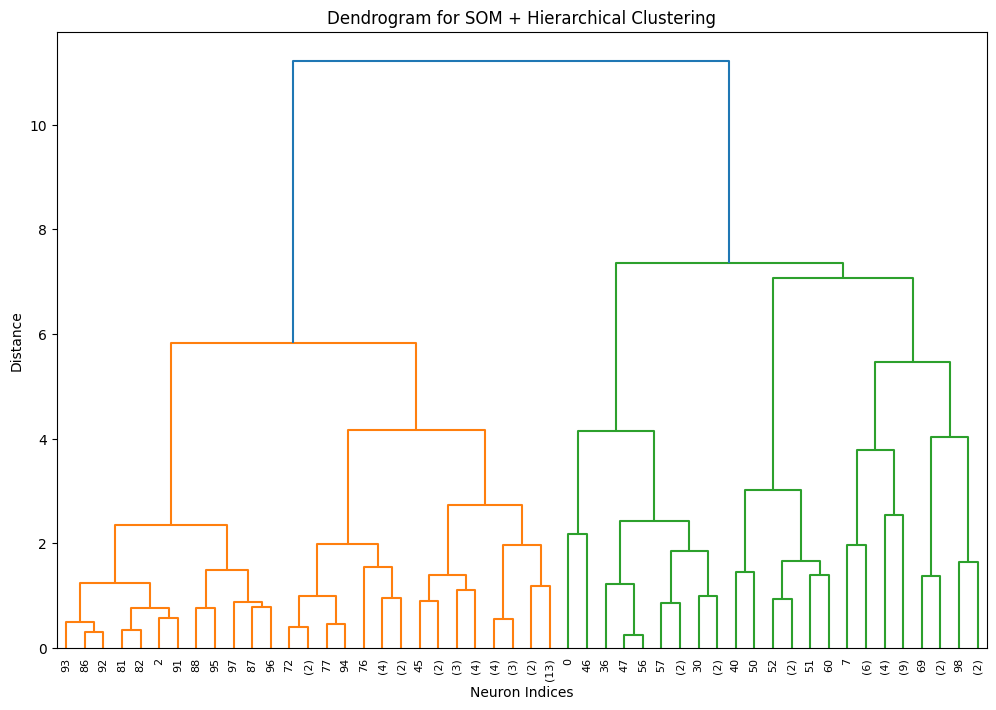

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [18]:
# Required imports
from minisom import MiniSom
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Scale the data
scaler = StandardScaler()
group_1_scaled = scaler.fit_transform(group_1)

# Define SOM dimensions
som_grid_x, som_grid_y = 10, 10

# Initialize and train SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(group_1_scaled)
som.train_random(data=group_1_scaled, num_iteration=500)

# Extract SOM weights and neuron indices
weights = som.get_weights().reshape(som_grid_x * som_grid_y, -1)
neuron_map_flat = np.array([som.winner(x)[0] * som_grid_y + som.winner(x)[1] for x in group_1_scaled])

# Perform hierarchical clustering on SOM weights
linkage_matrix = linkage(weights, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrogram for SOM + Hierarchical Clustering')
plt.xlabel('Neuron Indices')
plt.ylabel('Distance')
plt.show()

# Assign clusters based on dendrogram
num_clusters = 4  # Choose the number of clusters based on dendrogram analysis
som_clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Map SOM clusters back to the original data
# Match neuron indices to their corresponding clusters
neuron_to_cluster = {i: cluster for i, cluster in enumerate(som_clusters)}
data_som_clusters = np.array([neuron_to_cluster[n] for n in neuron_map_flat])

# Ensure `data_som_clusters` matches the number of rows in the original dataset
if len(data_som_clusters) != len(group_1):
    raise ValueError("The number of SOM clusters does not match the number of original data points.")

# Add clusters to the original dataset
group_1_with_clusters = group_1.copy()
group_1_with_clusters['SOM_Cluster'] = data_som_clusters

# Print cluster summary statistics
cluster_summary = group_1_with_clusters.groupby('SOM_Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

# Optional: Visualize SOM clusters
plt.figure(figsize=(8, 6))
for c in np.unique(som_clusters):
    plt.scatter(weights[som_clusters == c, 0], weights[som_clusters == c, 1], label=f'Cluster {c}')
plt.title("Clusters on SOM (Hierarchical Clustering)")
plt.xlabel("Feature 1 (SOM Neuron Weight)")
plt.ylabel("Feature 2 (SOM Neuron Weight)")
plt.legend()
plt.show()

## DBSCAN

DBSCAN Cluster Sizes:
DBSCAN_Cluster
-1    31776
 0       42
 1       42
 2       21
 3        7
Name: count, dtype: int64

Silhouette Score for Adjusted DBSCAN: 0.1514


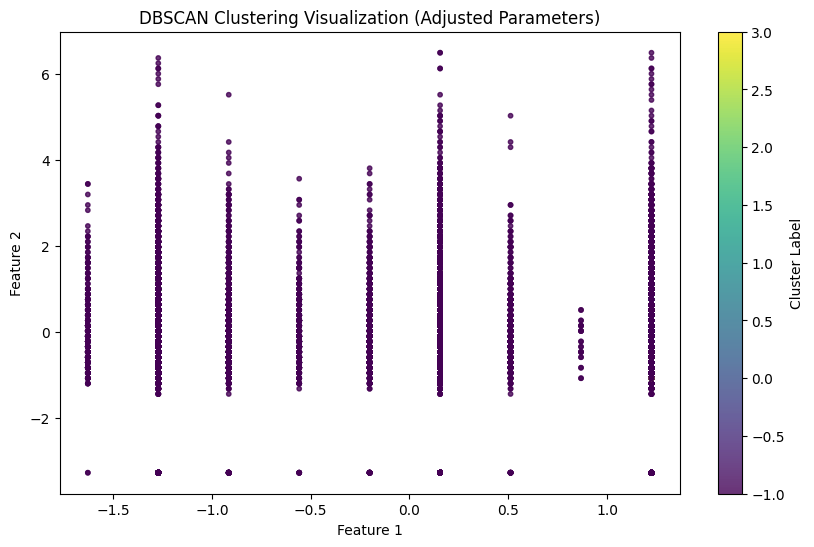

In [20]:
# Adjusted parameters for DBSCAN
eps = 1.5  # Increase neighborhood size
min_samples = 5  # Decrease minimum number of points to form a cluster

# Apply DBSCAN again
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(data_array)

# Add DBSCAN cluster labels to the dataset
data_with_clusters['DBSCAN_Cluster'] = dbscan_labels

# Count the number of points in each cluster
dbscan_cluster_sizes = data_with_clusters['DBSCAN_Cluster'].value_counts()
print("DBSCAN Cluster Sizes:")
print(dbscan_cluster_sizes)

# Calculate Silhouette Score if there are valid clusters
dbscan_labels_valid = dbscan_labels[dbscan_labels != -1]  # Exclude noise points
data_array_valid = data_array[dbscan_labels != -1]
if len(set(dbscan_labels_valid)) > 1:
    silhouette_avg_dbscan = silhouette_score(data_array_valid, dbscan_labels_valid)
    print(f"\nSilhouette Score for Adjusted DBSCAN: {silhouette_avg_dbscan:.4f}")
else:
    print("\nNot enough clusters for Silhouette Score calculation.")

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_array[:, 0], data_array[:, 1], c=dbscan_labels, cmap='viridis', s=10, alpha=0.8)
plt.title("DBSCAN Clustering Visualization (Adjusted Parameters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()

DBSCAN Cluster Sizes:
DBSCAN_Cluster
-1    31858
 0        7
 2        6
 3        6
 4        6
 1        5
Name: count, dtype: int64

Silhouette Score for Adjusted DBSCAN: 0.6084


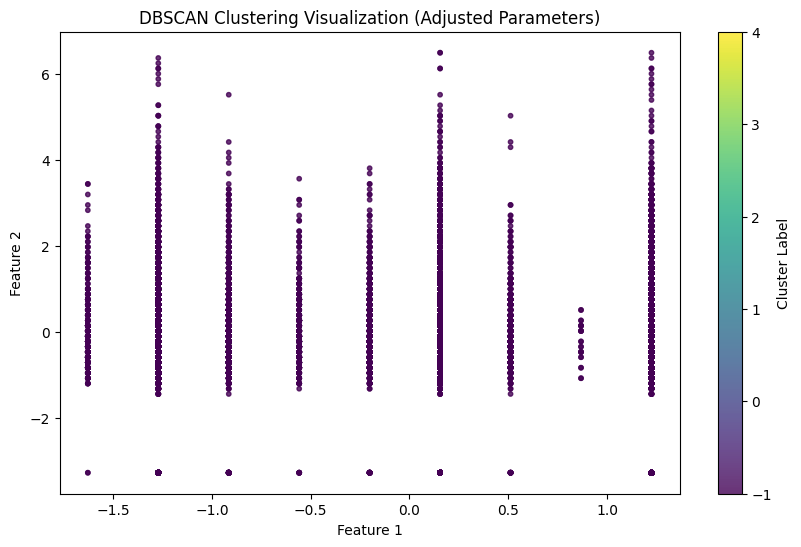

In [19]:
# Adjusted parameters for DBSCAN
eps = 1.5  # Increase neighborhood size
min_samples = 5  # Decrease minimum number of points to form a cluster

# Apply DBSCAN again
dbscan = DBSCAN(eps=1.5, min_samples=5, metric='manhattan')
dbscan_labels = dbscan.fit_predict(data_array)

# Add DBSCAN cluster labels to the dataset
data_with_clusters['DBSCAN_Cluster'] = dbscan_labels

# Count the number of points in each cluster
dbscan_cluster_sizes = data_with_clusters['DBSCAN_Cluster'].value_counts()
print("DBSCAN Cluster Sizes:")
print(dbscan_cluster_sizes)

# Calculate Silhouette Score if there are valid clusters
dbscan_labels_valid = dbscan_labels[dbscan_labels != -1]  # Exclude noise points
data_array_valid = data_array[dbscan_labels != -1]
if len(set(dbscan_labels_valid)) > 1:
    silhouette_avg_dbscan = silhouette_score(data_array_valid, dbscan_labels_valid)
    print(f"\nSilhouette Score for Adjusted DBSCAN: {silhouette_avg_dbscan:.4f}")
else:
    print("\nNot enough clusters for Silhouette Score calculation.")

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_array[:, 0], data_array[:, 1], c=dbscan_labels, cmap='viridis', s=10, alpha=0.8)
plt.title("DBSCAN Clustering Visualization (Adjusted Parameters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()

## K-Prototypes

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_26496\2068896467.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1[col] = le.fit_transform(group_1[col])
C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_26496\2068896467.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1[col] = le.fit_transform(group_1[col])
C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_26496\2068896467.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

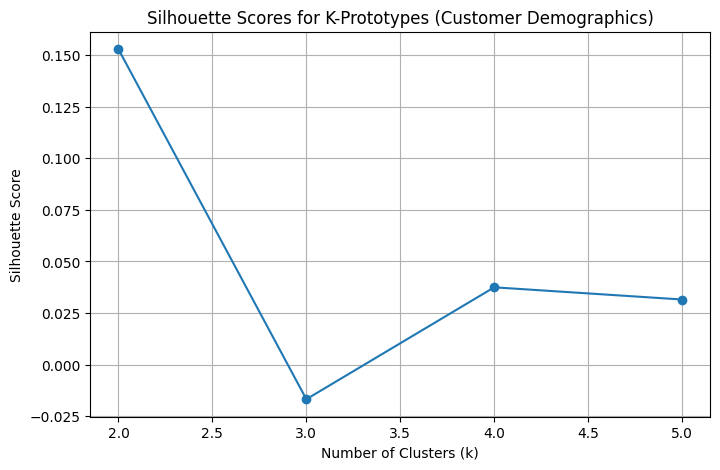

Optimal k: 2 Silhouette Score: 0.1527972841115862
Cluster Summary:
                       customer_age  is_chain  regular_customer  \
K_Prototypes_Cluster                                             
0                         0.335992  3.849224          0.919389   
1                         0.335994  0.999482          0.363840   

                      cuisine_loyalty  
K_Prototypes_Cluster                   
0                                 1.0  
1                                 0.0  


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_26496\2068896467.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['K_Prototypes_Cluster'] = final_clusters


In [30]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Ensure group_1 is a DataFrame
if not isinstance(group_1, pd.DataFrame):
    group_1 = pd.DataFrame(group_1, columns=['customer_age', 'is_chain', 'regular_customer', 'cuisine_loyalty'])

# Step 1: Prepare the data
# Identify categorical and numerical columns
categorical_cols = ['is_chain', 'regular_customer', 'cuisine_loyalty']
numerical_cols = ['customer_age']

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    group_1[col] = le.fit_transform(group_1[col])
    label_encoders[col] = le  # Store for decoding if needed

# Combine data into a NumPy array for K-Prototypes
group_1_array = group_1.values

# Step 2: Apply K-Prototypes
k_values = range(2, 6)  # Try different numbers of clusters
silhouette_scores = []

for k in k_values:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    clusters = kproto.fit_predict(group_1_array, categorical=list(range(len(categorical_cols))))
    
    # Calculate silhouette score
    score = silhouette_score(group_1, clusters, metric='euclidean')
    silhouette_scores.append(score)

# Step 3: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Prototypes (Customer Demographics)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 4: Choose optimal k (highest silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]
print("Optimal k:", optimal_k, "Silhouette Score:", max(silhouette_scores))

# Step 5: Apply K-Prototypes with optimal k
kproto = KPrototypes(n_clusters=optimal_k, init='Huang', random_state=42)
final_clusters = kproto.fit_predict(group_1_array, categorical=list(range(len(categorical_cols))))

# Add the cluster labels to the dataset
group_1['K_Prototypes_Cluster'] = final_clusters

# Step 6: Summarize the clusters
cluster_summary = group_1.groupby('K_Prototypes_Cluster').mean()
print("Cluster Summary:\n", cluster_summary)

Clusters exhibit distinct characteristics:
Cluster 1 has higher averages for features like customer_region, product_count, and is_chain, indicating customers who are likely loyal to chain restaurants and order a higher number of products.
Cluster 3 has lower averages for vendor_count and product_count, suggesting customers with limited activity.
Cluster 4 appears to have moderate activity across most features but is slightly more diverse in terms of age categories.

In [25]:
print("K-Prototypes Cluster Summary:")
print(cluster_summary)

K-Prototypes Cluster Summary:
                      customer_age  vendor_count  product_count  is_chain  \
K_Prototypes_Cluster                                                        
0                        26.981305      3.115433       5.713174  2.812547   
1                        26.817189      3.124341       5.758093  2.878545   
2                        26.835737      3.081755       5.585831  2.791473   
3                        26.883356      3.088925       5.615954  2.792926   

                      first_order  last_order  CUI_American  CUI_Asian  \
K_Prototypes_Cluster                                                     
0                       28.694228   63.803137      4.928665  10.215553   
1                       28.139774   63.696612      4.781494   9.723668   
2                       28.336552   63.423574      4.970591   9.817990   
3                       28.657720   63.778879      4.840959  10.084637   

                      CUI_Beverages  CUI_Cafe  ...  spending_s

In [26]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data[numeric_columns], data['K_Prototypes_Cluster'])
print(f"Silhouette Score for K-Prototypes Clustering: {silhouette_avg}")

Silhouette Score for K-Prototypes Clustering: -0.006480644346871196
